<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Firdaus_Arif_Ramadhani_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


## Healthcare Dataset
Dataset ini adalah data healthcare sintetis yang dibuat menggunakan Python Faker library untuk keperluan pembelajaran dan eksperimen dalam domain healthcare analytics. Dataset terdiri dari 10,000 records dengan 15 fitur yang mencakup informasi pasien, admisi, dan layanan kesehatan.

### Sumber Dataset
- **Platform**: Kaggle
- **Creator**: Prasad Patil
- **URL**: [Healthcare Dataset](https://www.kaggle.com/datasets/prasad22/healthcare-dataset)

### Informasi Dataset
- **Jumlah Records**: 10,000 data sintetis
- **Jumlah Features**: 15 kolom
- **Missing Values**: Tidak ada (data sintetis)
- **Tipe Data**: Mix (categorical dan numerical)

### Deskripsi Fitur
1. **Demografis Pasien**:
   - Name: Nama pasien
   - Age: Usia pasien (tahun)
   - Gender: Jenis kelamin (Male/Female)
   - Blood Type: Golongan darah (A+, O-, dll)

2. **Informasi Medis**:
   - Medical Condition: Diagnosis utama (Diabetes, Hypertension, Asthma, dll)
   - Test Results: Hasil tes medis (Normal, Abnormal, Inconclusive)
   - Medication: Obat yang diresepkan

3. **Data Administrasi**:
   - Date of Admission: Tanggal masuk rumah sakit
   - Doctor: Nama dokter yang menangani
   - Hospital: Nama fasilitas kesehatan
   - Insurance Provider: Penyedia asuransi
   - Billing Amount: Biaya layanan kesehatan
   - Room Number: Nomor kamar pasien
   - Admission Type: Tipe admisi (Emergency, Elective, Urgent)
   - Discharge Date: Tanggal keluar rumah sakit
---
**Note**: Dataset ini adalah data sintetis yang dibuat khusus untuk pembelajaran dan tidak mengandung informasi pasien nyata.

# **2. Import Library**

In [1]:
!pip install kaggle pandas numpy matplotlib seaborn plotly scikit-learn yellowbrick scipy

In [2]:
# Basic Data Processing and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Preprocessing and Feature Selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold

# Model Evaluation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import scipy.cluster.hierarchy as shc

# Date Processing
from datetime import datetime
import pandas as pd

# Warning Configuration
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

In [3]:
df = pd.read_csv('https://media.githubusercontent.com/media/fxrdhan/Machine-Learning-Project/refs/heads/main/data/healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# **4. Exploratory Data Analysis (EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
# Drop unnecessary columns
columns_to_drop = ['Name', 'Doctor', 'Hospital', 'Room Number', 'Date of Admission', 'Discharge Date']
df = df.drop(columns=columns_to_drop)

In [6]:
df.describe(include='all')

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
count,55500.000000,55500,55500,55500,55500,55500.000000,55500,55500,55500
unique,NaN,2,8,6,5,NaN,3,5,3
top,NaN,Male,A-,Arthritis,Cigna,NaN,Elective,Lipitor,Abnormal
freq,NaN,27774,6969,9308,11249,NaN,18655,11140,18627
mean,51.539459,NaN,NaN,NaN,NaN,25539.316097,NaN,NaN,NaN
std,19.602454,NaN,NaN,NaN,NaN,14211.454431,NaN,NaN,NaN
min,13.000000,NaN,NaN,NaN,NaN,-2008.492140,NaN,NaN,NaN
25%,35.000000,NaN,NaN,NaN,NaN,13241.224652,NaN,NaN,NaN
50%,52.000000,NaN,NaN,NaN,NaN,25538.069376,NaN,NaN,NaN
75%,68.000000,NaN,NaN,NaN,NaN,37820.508436,NaN,NaN,NaN


In [7]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_columns.tolist())

print("\nCategorical Columns:")
print(categorical_columns.tolist())

Numerical Columns:
['Age', 'Billing Amount']

Categorical Columns:
['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


In [8]:
df[numerical_columns].describe()

,Age,Billing Amount
count,55500.000000,55500.000000
mean,51.539459,25539.316097
std,19.602454,14211.454431
min,13.000000,-2008.492140
25%,35.000000,13241.224652
50%,52.000000,25538.069376
75%,68.000000,37820.508436
max,89.000000,52764.276736


In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Insurance Provider,0
Billing Amount,0
Admission Type,0
Medication,0
Test Results,0


In [10]:
for col in numerical_columns:
    print(f"\n{col} Statistics:")
    stats = df[col].describe()
    print(stats)
    print(f"Skewness: {df[col].skew():.3f}")
    print(f"Kurtosis: {df[col].kurtosis():.3f}")


Age Statistics:
count    55500.000000
mean        51.539459
std         19.602454
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64
Skewness: -0.006
Kurtosis: -1.186

Billing Amount Statistics:
count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      52764.276736
Name: Billing Amount, dtype: float64
Skewness: -0.001
Kurtosis: -1.191


In [11]:
print(df.columns.tolist())

['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication', 'Test Results']


In [12]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal


In [13]:
for col in categorical_columns:
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100

    print(f"\n{col} Distribution:")
    for val, count in value_counts.items():
        print(f"{val}: {count} ({percentages[val]:.1f}%)")


Gender Distribution:
Male: 27774 (50.0%)
Female: 27726 (50.0%)

Blood Type Distribution:
A-: 6969 (12.6%)
A+: 6956 (12.5%)
AB+: 6947 (12.5%)
AB-: 6945 (12.5%)
B+: 6945 (12.5%)
B-: 6944 (12.5%)
O+: 6917 (12.5%)
O-: 6877 (12.4%)

Medical Condition Distribution:
Arthritis: 9308 (16.8%)
Diabetes: 9304 (16.8%)
Hypertension: 9245 (16.7%)
Obesity: 9231 (16.6%)
Cancer: 9227 (16.6%)
Asthma: 9185 (16.5%)

Insurance Provider Distribution:
Cigna: 11249 (20.3%)
Medicare: 11154 (20.1%)
UnitedHealthcare: 11125 (20.0%)
Blue Cross: 11059 (19.9%)
Aetna: 10913 (19.7%)

Admission Type Distribution:
Elective: 18655 (33.6%)
Urgent: 18576 (33.5%)
Emergency: 18269 (32.9%)

Medication Distribution:
Lipitor: 11140 (20.1%)
Ibuprofen: 11127 (20.0%)
Aspirin: 11094 (20.0%)
Paracetamol: 11071 (19.9%)
Penicillin: 11068 (19.9%)

Test Results Distribution:
Abnormal: 18627 (33.6%)
Normal: 18517 (33.4%)
Inconclusive: 18356 (33.1%)


In [14]:
def plot_distribution(data, column):
    plt.figure(figsize=(12, 4))

    # Subplot 1: Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'{column} Distribution')

    # Subplot 2: Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, y=column)
    plt.title(f'Box Plot {column}')

    plt.tight_layout()
    plt.show()

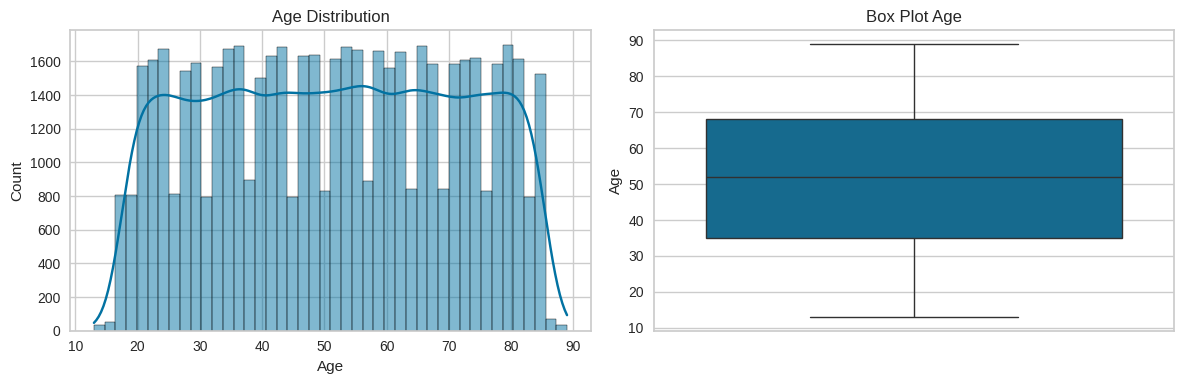

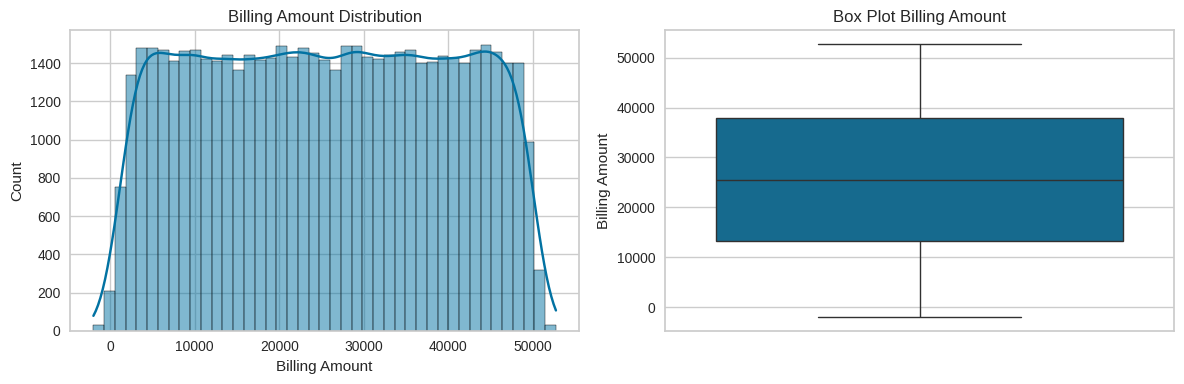

In [15]:
for col in numerical_columns:
    plot_distribution(df, col)

In [16]:
def print_categorical_stats(data, column):
    value_counts = data[column].value_counts()
    percentages = data[column].value_counts(normalize=True) * 100

    print(f"{column} Distribution:")
    for val, count in value_counts.items():
        print(f"{val}: {count} ({percentages[val]:.1f}%)")

In [17]:
for col in categorical_columns:
    print_categorical_stats(df, col)

Gender Distribution:
Male: 27774 (50.0%)
Female: 27726 (50.0%)
Blood Type Distribution:
A-: 6969 (12.6%)
A+: 6956 (12.5%)
AB+: 6947 (12.5%)
AB-: 6945 (12.5%)
B+: 6945 (12.5%)
B-: 6944 (12.5%)
O+: 6917 (12.5%)
O-: 6877 (12.4%)
Medical Condition Distribution:
Arthritis: 9308 (16.8%)
Diabetes: 9304 (16.8%)
Hypertension: 9245 (16.7%)
Obesity: 9231 (16.6%)
Cancer: 9227 (16.6%)
Asthma: 9185 (16.5%)
Insurance Provider Distribution:
Cigna: 11249 (20.3%)
Medicare: 11154 (20.1%)
UnitedHealthcare: 11125 (20.0%)
Blue Cross: 11059 (19.9%)
Aetna: 10913 (19.7%)
Admission Type Distribution:
Elective: 18655 (33.6%)
Urgent: 18576 (33.5%)
Emergency: 18269 (32.9%)
Medication Distribution:
Lipitor: 11140 (20.1%)
Ibuprofen: 11127 (20.0%)
Aspirin: 11094 (20.0%)
Paracetamol: 11071 (19.9%)
Penicillin: 11068 (19.9%)
Test Results Distribution:
Abnormal: 18627 (33.6%)
Normal: 18517 (33.4%)
Inconclusive: 18356 (33.1%)


In [18]:
def plot_categorical_distribution(data, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=column)
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

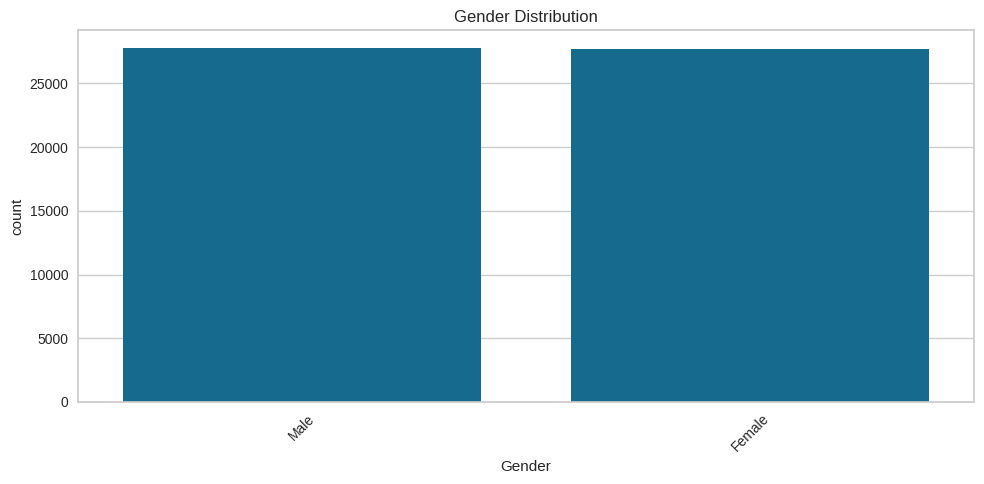

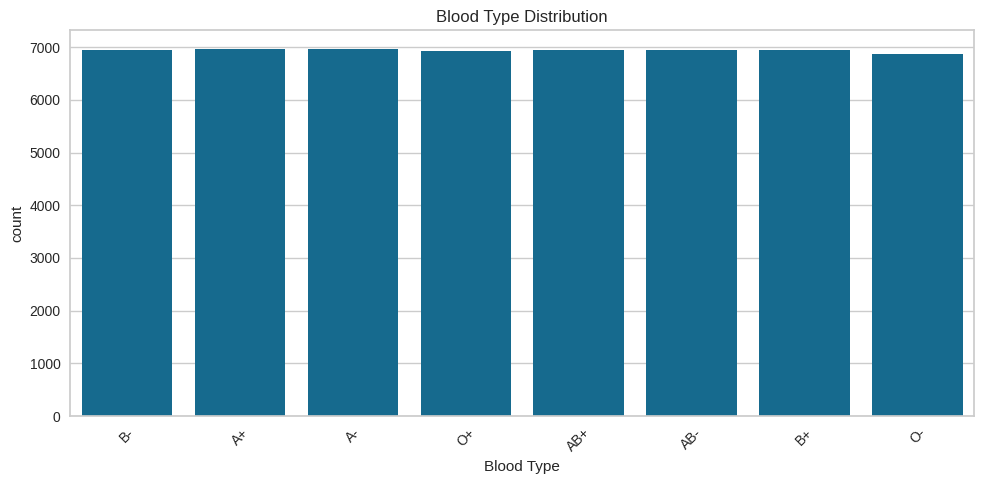

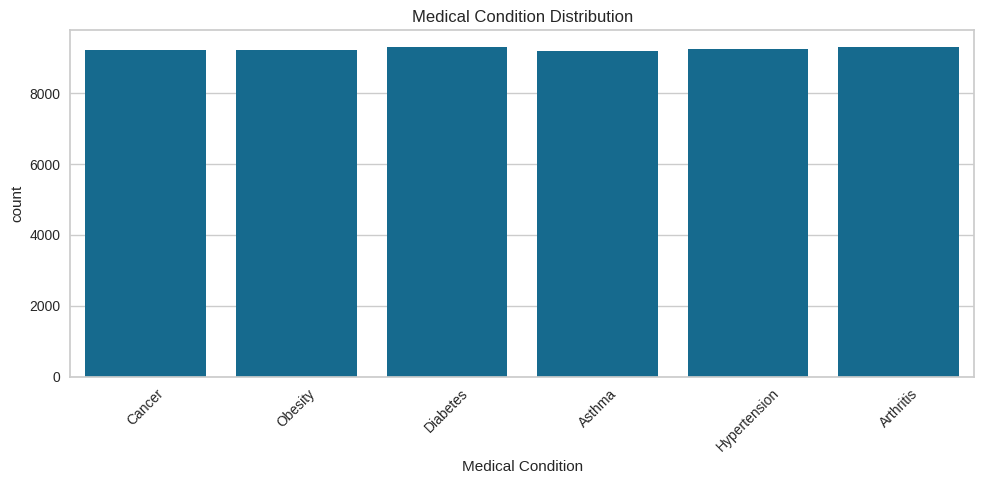

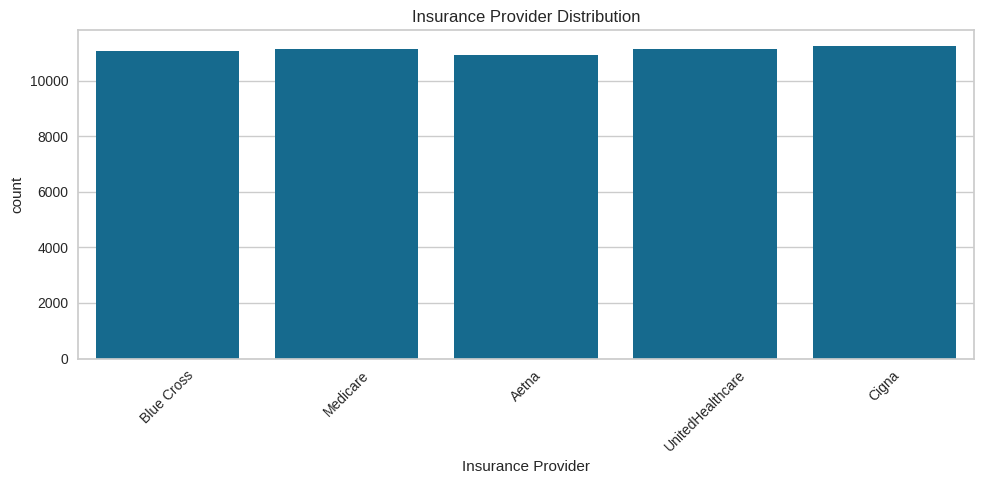

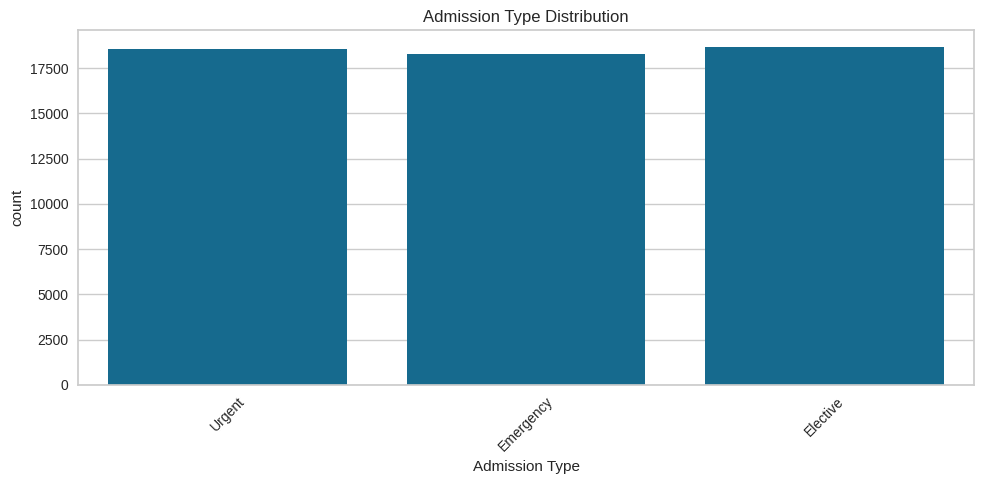

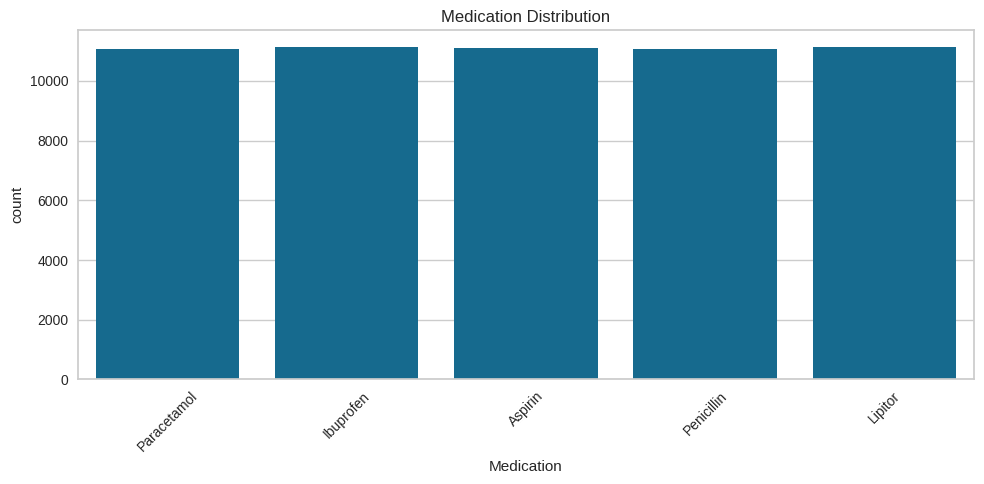

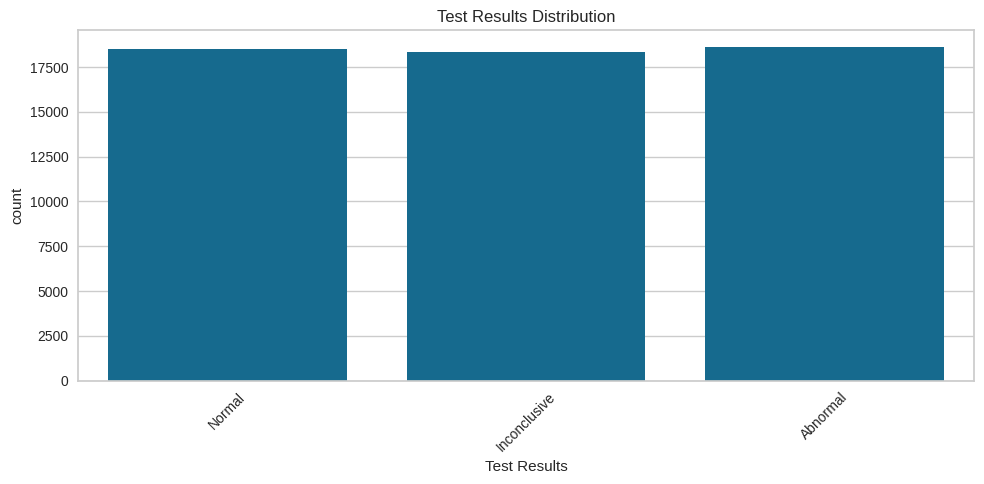

In [19]:
for col in categorical_columns:
    plot_categorical_distribution(df, col)

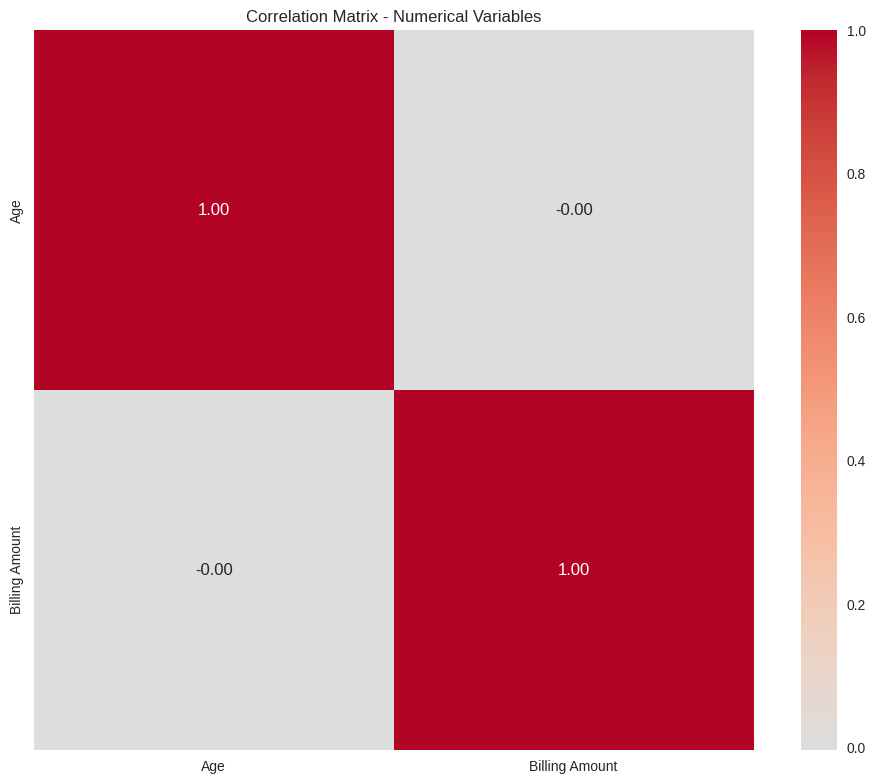

In [20]:
# Hitung korelasi untuk variabel numerik
correlation_matrix = df[numerical_columns].corr()

# Visualisasi matrix korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Matrix - Numerical Variables')
plt.tight_layout()
plt.show()

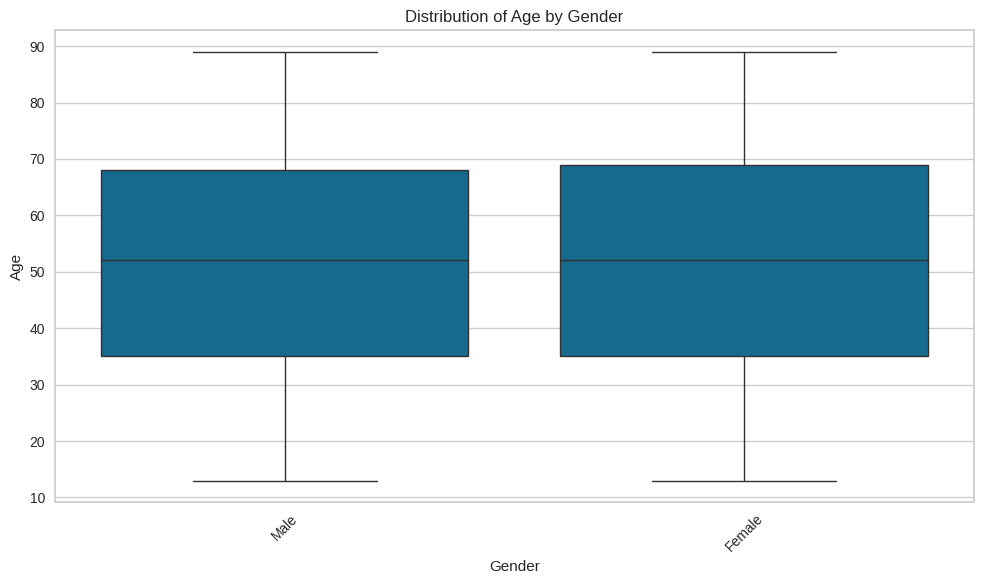

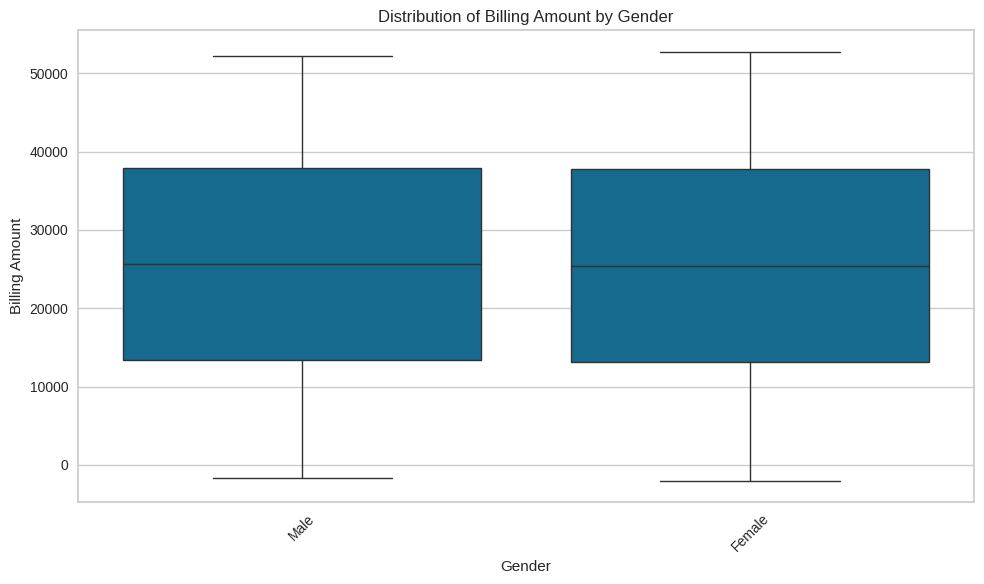

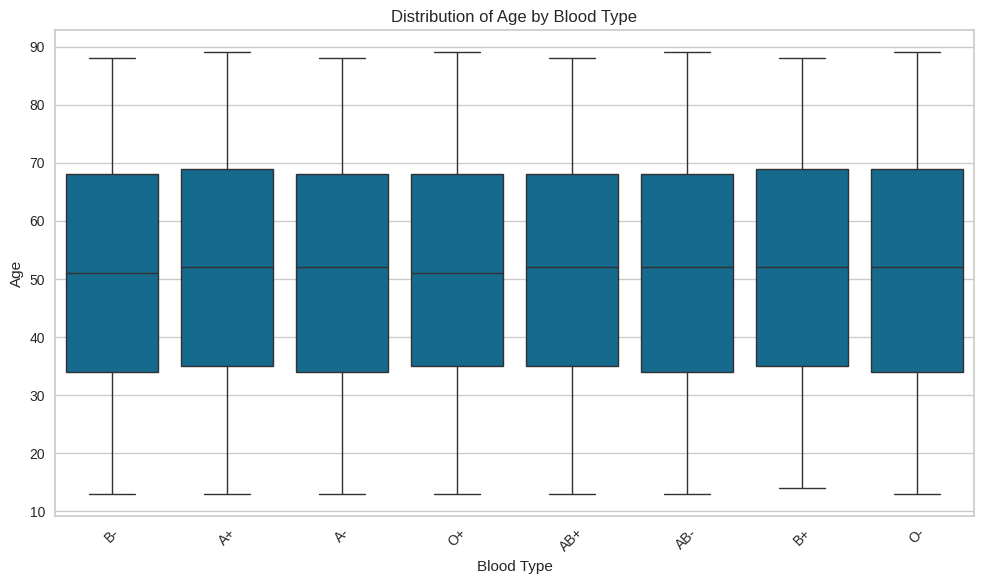

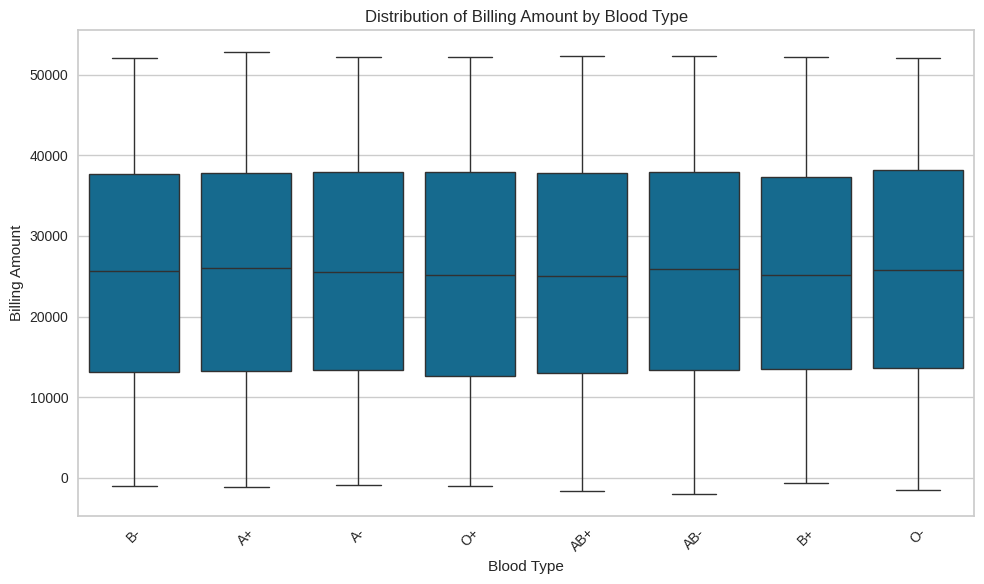

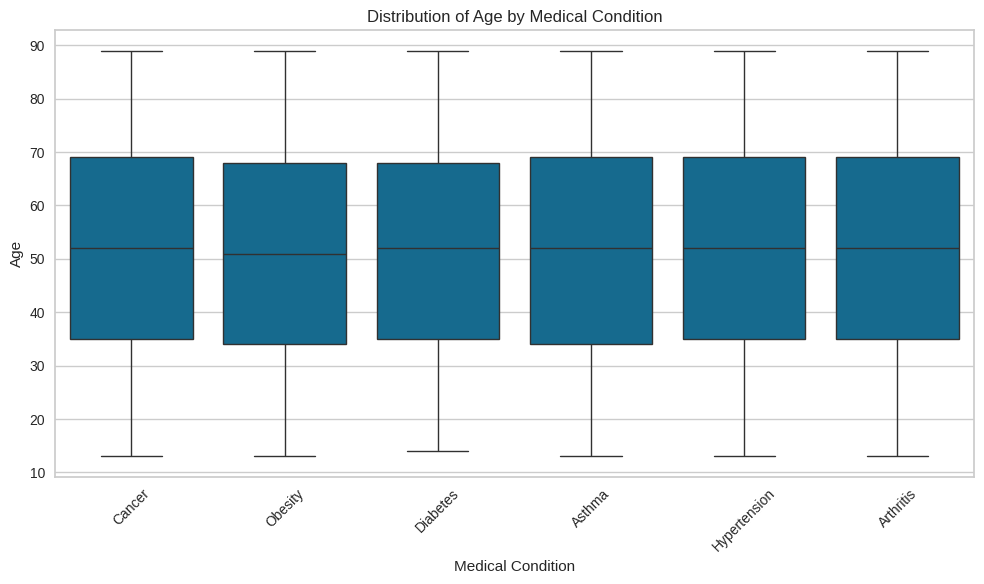

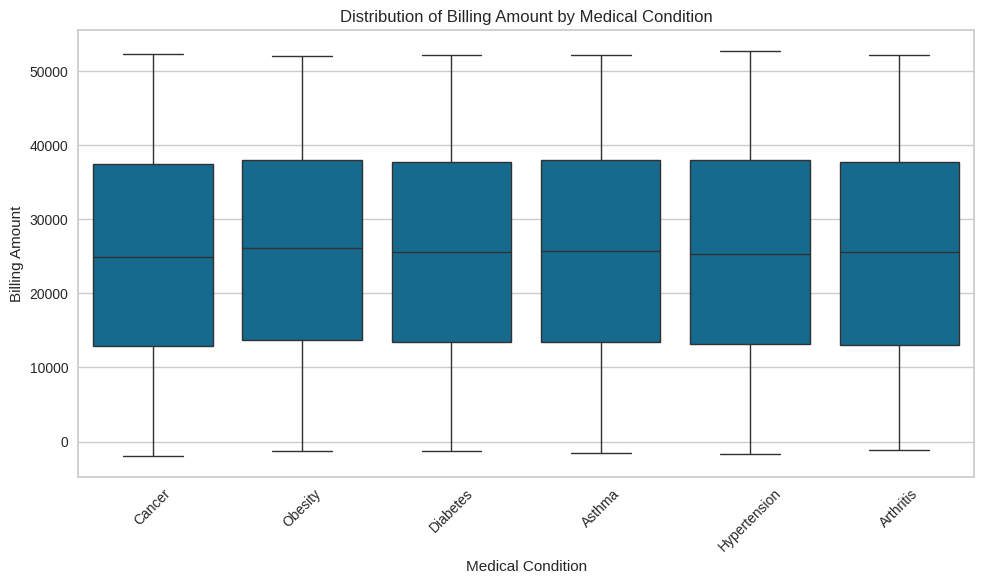

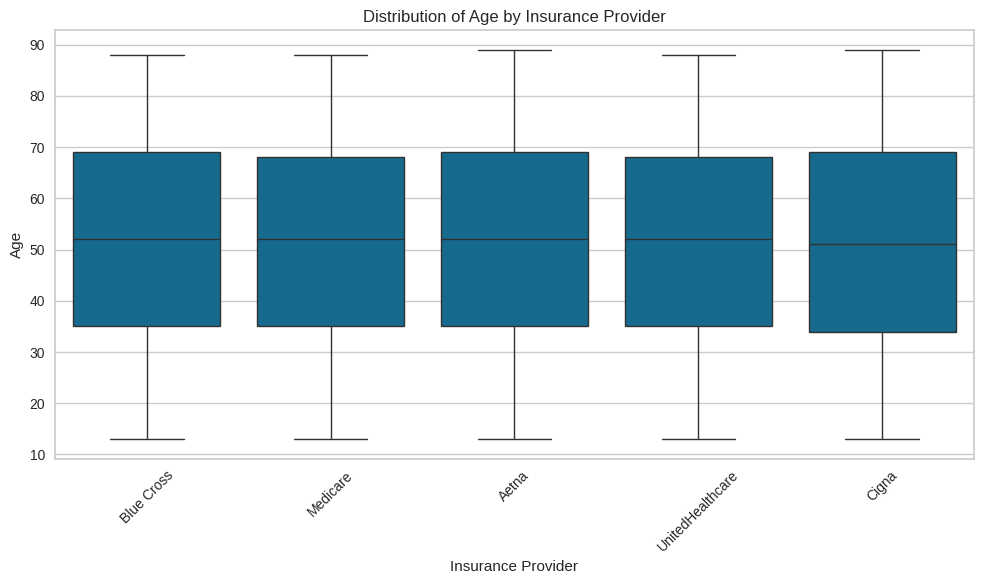

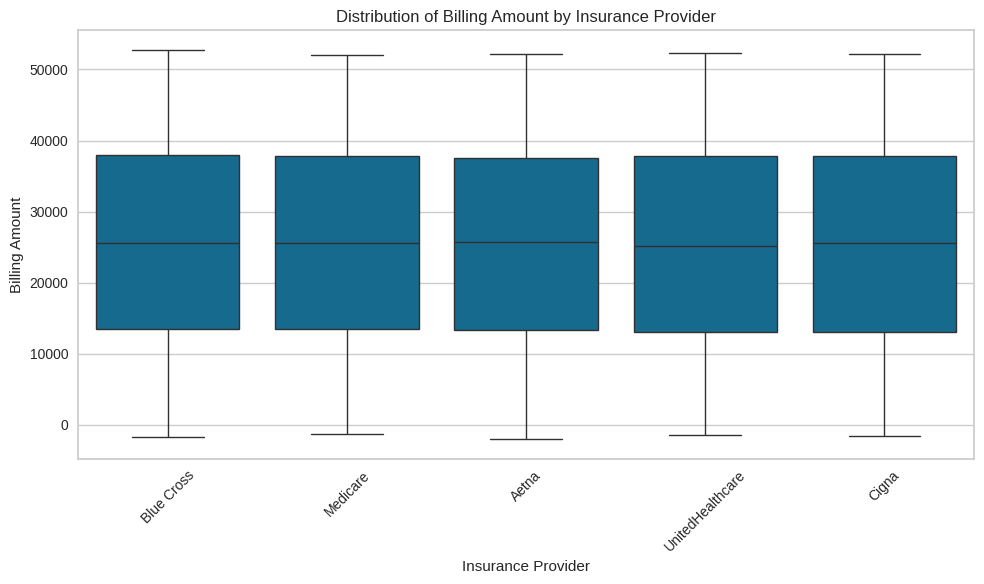

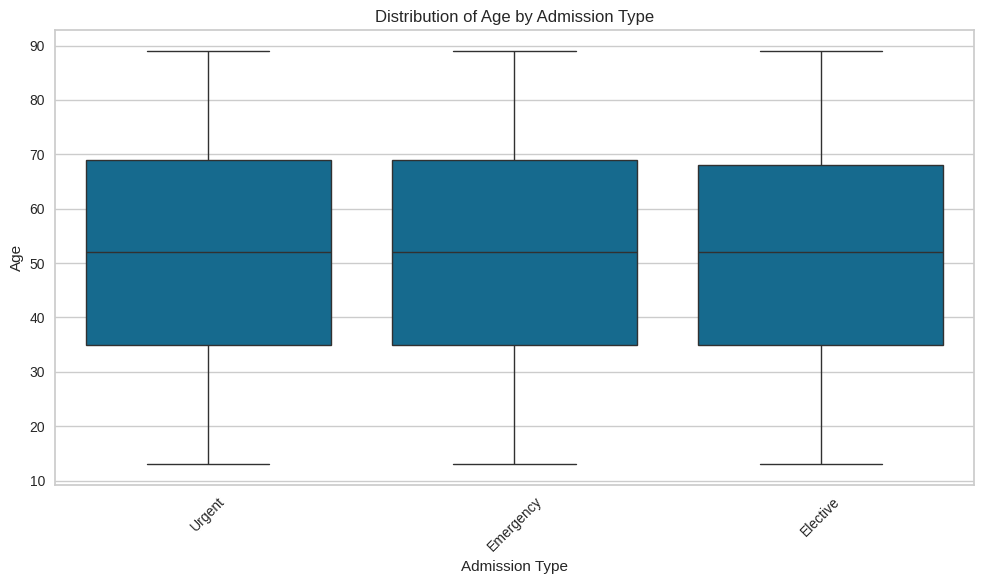

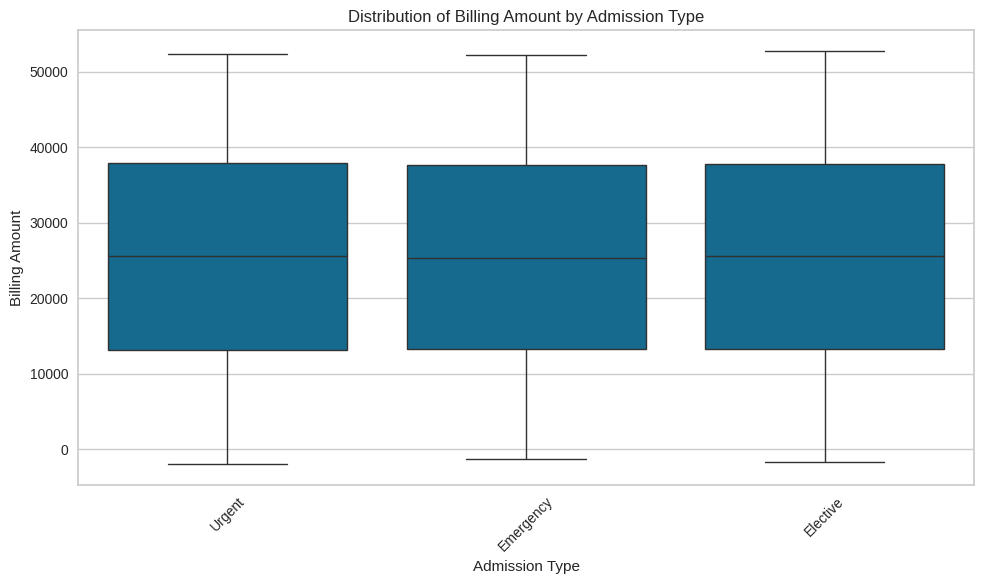

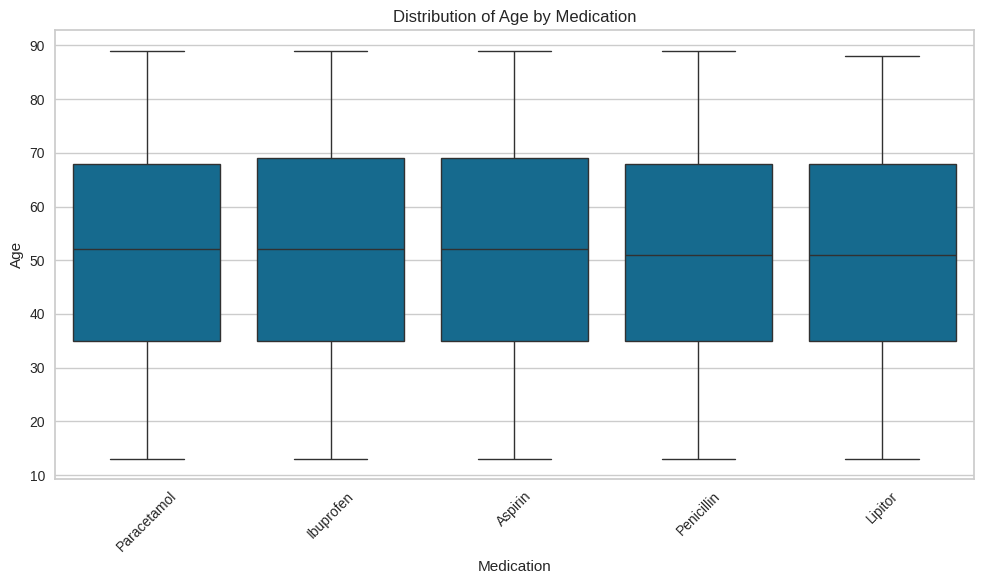

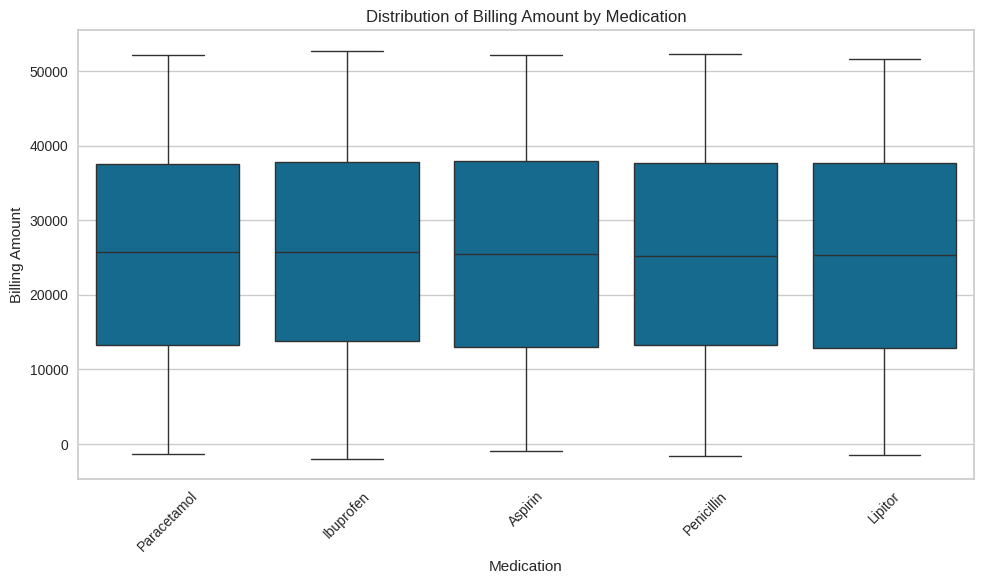

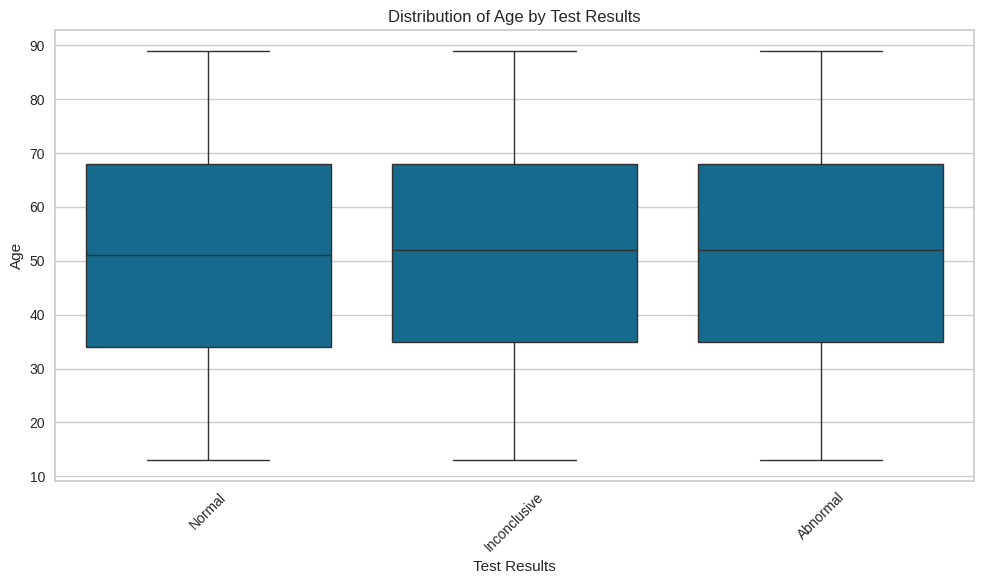

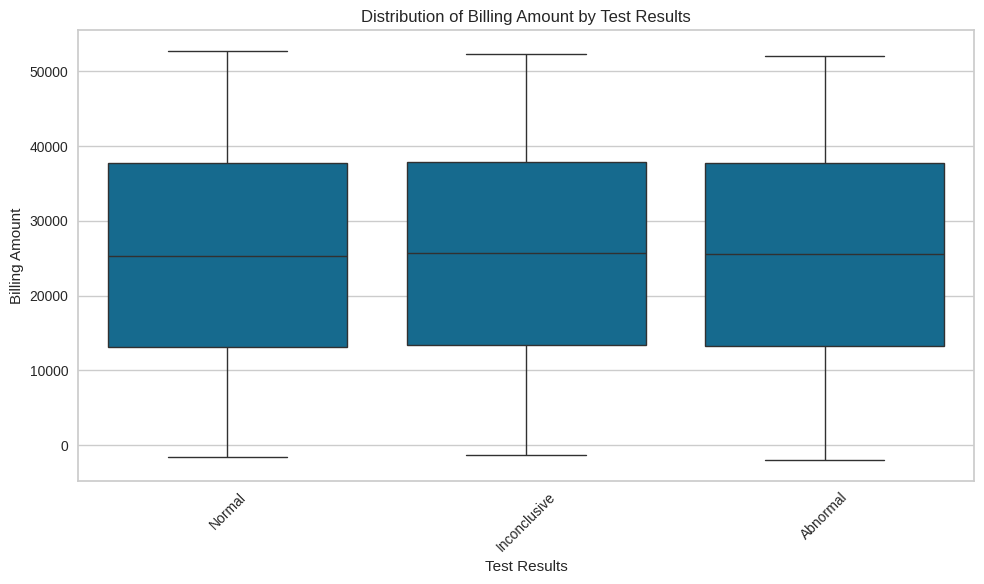

In [21]:
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'Distribution of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# **5. Data Preprocessing**

In [22]:
df.duplicated().sum()

534

In [23]:
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
7631,18,Female,B+,Obesity,Cigna,15224.979565,Emergency,Penicillin,Inconclusive
51334,18,Female,B+,Obesity,Cigna,15224.979565,Emergency,Penicillin,Inconclusive
11872,18,Female,B-,Arthritis,Blue Cross,48441.777956,Emergency,Ibuprofen,Abnormal
55147,18,Female,B-,Arthritis,Blue Cross,48441.777956,Emergency,Ibuprofen,Abnormal
41445,19,Female,AB+,Asthma,UnitedHealthcare,44723.613544,Urgent,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...
54933,85,Male,AB+,Hypertension,Aetna,36522.885050,Emergency,Aspirin,Abnormal
25752,85,Male,B-,Diabetes,UnitedHealthcare,42973.649164,Emergency,Paracetamol,Normal
50802,85,Male,B-,Diabetes,UnitedHealthcare,42973.649164,Emergency,Paracetamol,Normal
13774,85,Male,O+,Cancer,UnitedHealthcare,24347.423345,Urgent,Paracetamol,Abnormal


In [24]:
df = df.drop_duplicates(keep='first')

In [25]:
df.duplicated().sum()

0

In [26]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound


Column: Age
Number of outliers: 0
Lower bound: -14.50
Upper bound: 117.50


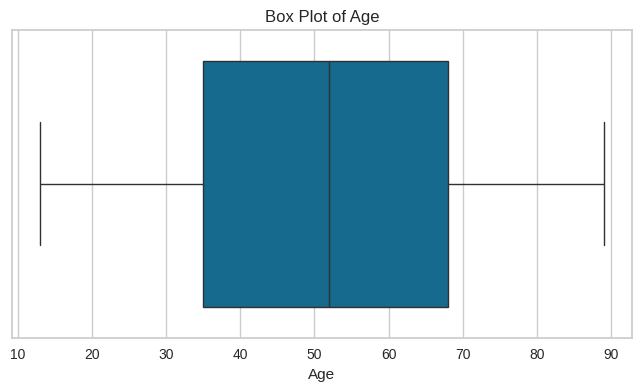


Descriptive Statistics for Age:
count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

Column: Billing Amount
Number of outliers: 0
Lower bound: -23620.49
Upper bound: 74684.07


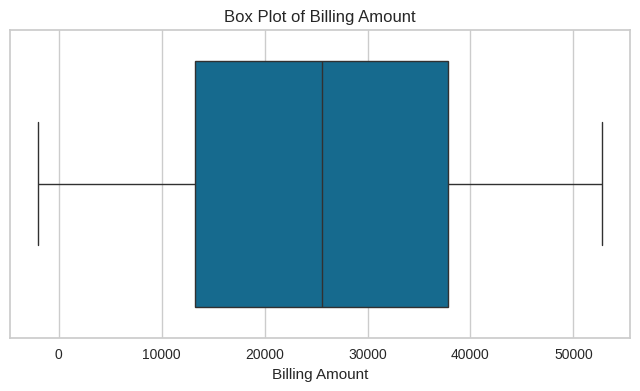


Descriptive Statistics for Billing Amount:
count    54966.000000
mean     25544.306284
std      14208.409711
min      -2008.492140
25%      13243.718641
50%      25542.749145
75%      37819.858159
max      52764.276736
Name: Billing Amount, dtype: float64


In [27]:
for column in numerical_columns:
    n_outliers, lower, upper = detect_outliers_iqr(df, column)
    print(f"\nColumn: {column}")
    print(f"Number of outliers: {n_outliers}")
    print(f"Lower bound: {lower:.2f}")
    print(f"Upper bound: {upper:.2f}")

    # Visualization with box plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

    # Display descriptive statistics
    print(f"\nDescriptive Statistics for {column}:")
    print(df[column].describe())

In [28]:
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


Gender:
Gender
Male      27496
Female    27470
Name: count, dtype: int64

Blood Type:
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

Medical Condition:
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

Insurance Provider:
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

Admission Type:
Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64

Medication:
Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64

Test Results:
Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64


In [29]:
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column + '_encoded'] = label_encoders[column].fit_transform(df[column])

    # Display mapping
    print(f"Mapping for {column}:")
    for i, label in enumerate(label_encoders[column].classes_):
        print(f"{label} -> {i}")

Mapping for Gender:
Female -> 0
Male -> 1
Mapping for Blood Type:
A+ -> 0
A- -> 1
AB+ -> 2
AB- -> 3
B+ -> 4
B- -> 5
O+ -> 6
O- -> 7
Mapping for Medical Condition:
Arthritis -> 0
Asthma -> 1
Cancer -> 2
Diabetes -> 3
Hypertension -> 4
Obesity -> 5
Mapping for Insurance Provider:
Aetna -> 0
Blue Cross -> 1
Cigna -> 2
Medicare -> 3
UnitedHealthcare -> 4
Mapping for Admission Type:
Elective -> 0
Emergency -> 1
Urgent -> 2
Mapping for Medication:
Aspirin -> 0
Ibuprofen -> 1
Lipitor -> 2
Paracetamol -> 3
Penicillin -> 4
Mapping for Test Results:
Abnormal -> 0
Inconclusive -> 1
Normal -> 2


In [30]:
df = df.drop(columns=categorical_columns)

print("Columns after encoding:")
print(df.columns.tolist())

Columns after encoding:
['Age', 'Billing Amount', 'Gender_encoded', 'Blood Type_encoded', 'Medical Condition_encoded', 'Insurance Provider_encoded', 'Admission Type_encoded', 'Medication_encoded', 'Test Results_encoded']


In [31]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display scaling results
print("Descriptive Statistics after scaling:")
df[numerical_columns].describe()

Descriptive Statistics after scaling:


,Age,Billing Amount
count,5.496600e+04,5.496600e+04
mean,-6.928845e-17,-2.369510e-16
std,1.000009e+00,1.000009e+00
min,-1.965531e+00,-1.939207e+00
25%,-8.433960e-01,-8.657337e-01
50%,2.370840e-02,-1.095938e-04
75%,8.398066e-01,8.639717e-01
max,1.910936e+00,1.915782e+00


In [32]:
# Save scaler information
scaler_params = {
    'mean': scaler.mean_,
    'scale': scaler.scale_
}

print("Scaling Parameters:")
for col, (mean, scale) in zip(numerical_columns, zip(scaler_params['mean'], scaler_params['scale'])):
    print(f"\n{col}:")
    print(f"Mean: {mean:.4f}")
    print(f"Scale: {scale:.4f}")

Scaling Parameters:

Age:
Mean: 51.5352
Scale: 19.6055

Billing Amount:
Mean: 25544.3063
Scale: 14208.2805


In [33]:
# Final dataset after preprocessing
print("Final dataset shape:", df.shape)
print("\nColumns in the final dataset:")
print(df.columns.tolist())

Final dataset shape: (54966, 9)

Columns in the final dataset:
['Age', 'Billing Amount', 'Gender_encoded', 'Blood Type_encoded', 'Medical Condition_encoded', 'Insurance Provider_encoded', 'Admission Type_encoded', 'Medication_encoded', 'Test Results_encoded']


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

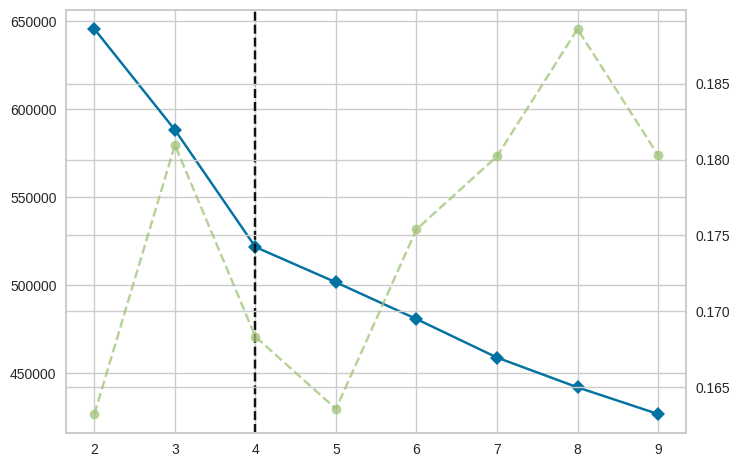

In [34]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
optimal_k = visualizer.elbow_value_
plt.show()

In [35]:
optimal_k

4

In [36]:
silhouette_scores = {}
K = range(2, 6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores[k] = score
    print(f'Silhouette Score k={k}: {score:.3f}')

Silhouette Score k=2: 0.222
Silhouette Score k=3: 0.162
Silhouette Score k=4: 0.151
Silhouette Score k=5: 0.135


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [37]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

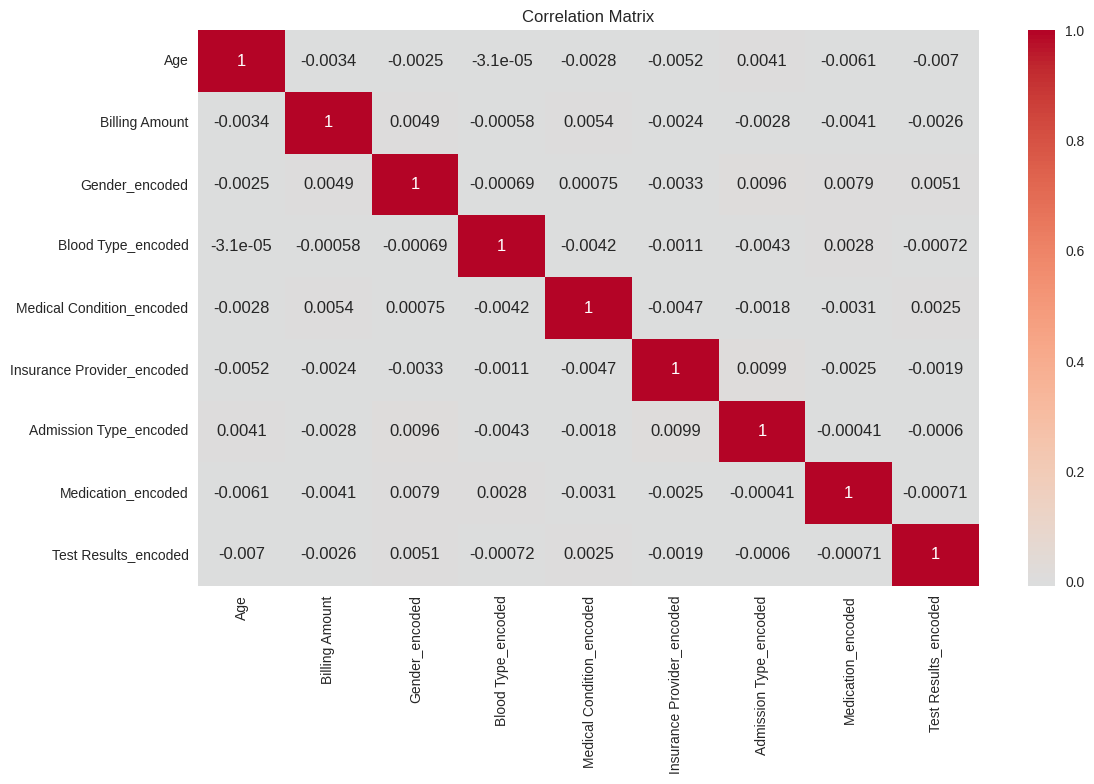

In [38]:
correlation_matrix = df.corr()

# Visualisasi korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

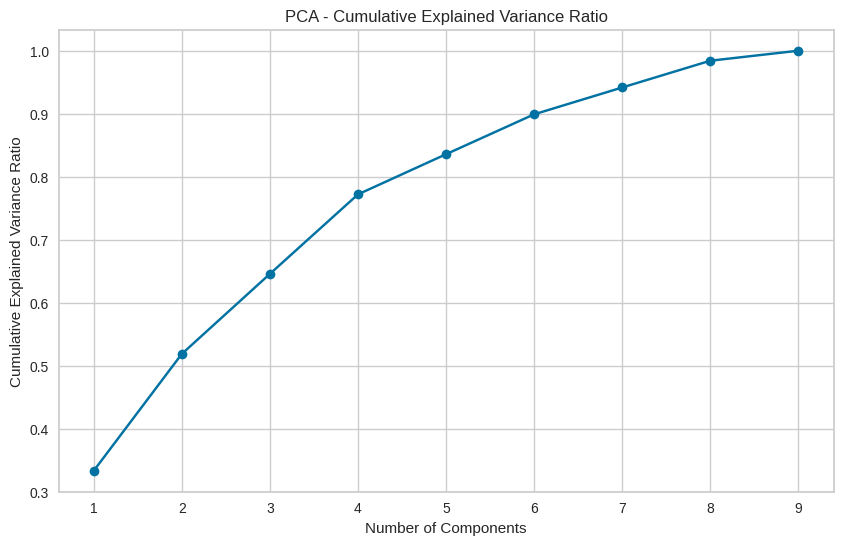


Jumlah komponen optimal untuk menjelaskan 80% variance: 5


In [39]:
pca = PCA()
pca_result = pca.fit_transform(df)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Pilih jumlah komponen yang menjelaskan 80% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.8) + 1
print(f"\nJumlah komponen optimal untuk menjelaskan 80% variance: {n_components}")

In [40]:
# Pilih jumlah komponen yang menjelaskan 80% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.8) + 1
print(f"\nJumlah komponen optimal untuk menjelaskan 80% variance: {n_components}")

# 3. Terapkan PCA dengan jumlah komponen optimal
pca_final = PCA(n_components=n_components)
df_pca = pca_final.fit_transform(df)

# Feature importance dari PCA
feature_importance = pd.DataFrame(
    pca_final.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=df.columns
)

print("\nKontribusi setiap fitur pada komponen utama:")
print(feature_importance)


Jumlah komponen optimal untuk menjelaskan 80% variance: 5

Kontribusi setiap fitur pada komponen utama:
                                 PC1       PC2       PC3       PC4       PC5
Age                        -0.000013 -0.002427 -0.004454 -0.010556  0.709363
Billing Amount             -0.000328  0.004877 -0.003653 -0.005594 -0.704664
Gender_encoded             -0.000157  0.000236  0.003419  0.000245 -0.003437
Blood Type_encoded          0.999969  0.007052 -0.002970 -0.000158 -0.000169
Medical Condition_encoded  -0.007044  0.999853  0.001785  0.014439  0.005237
Insurance Provider_encoded -0.001074 -0.012155 -0.442568  0.896570  0.002738
Admission Type_encoded     -0.001764 -0.001243 -0.004094  0.007552  0.012059
Medication_encoded          0.002788 -0.007965  0.896694  0.442437  0.002063
Test Results_encoded       -0.000299  0.001588  0.000200 -0.001646 -0.007557


In [41]:
silhouette_scores_pca = {}
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores_pca[k] = score
    print(f'\nSilhouette Score k={k} (with PCA): {score:.3f}')


Silhouette Score k=2 (with PCA): 0.172

Silhouette Score k=3 (with PCA): 0.214

Silhouette Score k=4 (with PCA): 0.196

Silhouette Score k=5 (with PCA): 0.182

Silhouette Score k=6 (with PCA): 0.169

Silhouette Score k=7 (with PCA): 0.168

Silhouette Score k=8 (with PCA): 0.164

Silhouette Score k=9 (with PCA): 0.168

Silhouette Score k=10 (with PCA): 0.164


In [42]:
# 1. Memilih fitur spesifik berdasarkan domain knowledge
selected_features = ['Age', 'Billing Amount', 'Medical Condition_encoded',
                    'Insurance Provider_encoded', 'Admission Type_encoded']

# Mengambil hanya fitur yang dipilih
X_selected = df[selected_features]

In [43]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)

In [44]:
# 3.1 KMeans
kmeans_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    kmeans_scores[k] = score
    print(f'KMeans Silhouette Score k={k}: {score:.3f}')

KMeans Silhouette Score k=2: 0.202
KMeans Silhouette Score k=3: 0.172
KMeans Silhouette Score k=4: 0.165
KMeans Silhouette Score k=5: 0.164
KMeans Silhouette Score k=6: 0.164
KMeans Silhouette Score k=7: 0.171
KMeans Silhouette Score k=8: 0.171
KMeans Silhouette Score k=9: 0.170
KMeans Silhouette Score k=10: 0.172


In [45]:
# 3.2 DBSCAN dengan berbagai parameter
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15, 20]

print("\nDBSCAN Evaluation:")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(set(labels)) > 1:  # Skip if all points are noise
            score = silhouette_score(X_scaled, labels)
            print(f'DBSCAN (eps={eps}, min_samples={min_samples}) Silhouette Score: {score:.3f}')


DBSCAN Evaluation:
DBSCAN (eps=0.3, min_samples=5) Silhouette Score: 0.056
DBSCAN (eps=0.3, min_samples=10) Silhouette Score: 0.056
DBSCAN (eps=0.3, min_samples=15) Silhouette Score: 0.056
DBSCAN (eps=0.3, min_samples=20) Silhouette Score: 0.055
DBSCAN (eps=0.5, min_samples=5) Silhouette Score: 0.071
DBSCAN (eps=0.5, min_samples=10) Silhouette Score: 0.071
DBSCAN (eps=0.5, min_samples=15) Silhouette Score: 0.071
DBSCAN (eps=0.5, min_samples=20) Silhouette Score: 0.071


In [46]:
# 3.3 Hierarchical Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
hierarchical_scores = {}
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    hierarchical_scores[k] = score
    print(f'\nHierarchical Clustering k={k} Silhouette Score: {score:.3f}')


Hierarchical Clustering k=2 Silhouette Score: 0.190

Hierarchical Clustering k=3 Silhouette Score: 0.134

Hierarchical Clustering k=4 Silhouette Score: 0.109

Hierarchical Clustering k=5 Silhouette Score: 0.111

Hierarchical Clustering k=6 Silhouette Score: 0.102

Hierarchical Clustering k=7 Silhouette Score: 0.103


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(list(kmeans_scores.keys()), list(kmeans_scores.values()), marker='o', label='KMeans')
plt.plot(list(hierarchical_scores.keys()), list(hierarchical_scores.values()), marker='s', label='Hierarchical')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Algorithms')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_kmeans = max(kmeans_scores.items(), key=lambda x: x[1])
best_hierarchical = max(hierarchical_scores.items(), key=lambda x: x[1])

print("\nHasil Terbaik:")
print(f"KMeans terbaik: k={best_kmeans[0]}, score={best_kmeans[1]:.3f}")
print(f"Hierarchical terbaik: k={best_hierarchical[0]}, score={best_hierarchical[1]:.3f}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.